# Make an autoencoder for MNIST digits
Summary: the autoencoders work fairly well. The variational autoencoder doesn't work that well.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import os

/home/austin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [31]:
tf.reset_default_graph()

# Saving dir
save_dir = "./models/mnist_autoencode1"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
checkpt_name = "mnist_autoencode"
full_save_path = os.path.join(save_dir, checkpt_name)

X = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="X")
h1 = tf.layers.dense(X, 500, activation=tf.nn.elu)
h2 = tf.layers.dense(h1, 250, activation=tf.nn.elu)
X_out = tf.layers.dense(h2, mnist.train.images.shape[1], name="X_out")

loss = tf.reduce_mean(tf.square(X-X_out))
optimizer = tf.train.AdamOptimizer(1e-3)
train_op = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=4)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        X_batch, _ = mnist.train.next_batch(100)
        _, loss_val = sess.run([train_op, loss], feed_dict={X: X_batch})
        
        if i % 50 == 0:
            val_loss = sess.run(loss, feed_dict={X: mnist.validation.images})
            print("Epoch {}: tr loss = {:.2e}; val loss = {:.2e}".format(i, loss_val, val_loss))
            
        if i % 200 == 0:
            saver.save(sess, full_save_path, global_step=i)
            print("Model saved")

Epoch 0: tr loss = 1.66e-01; val loss = 1.30e-01
Model saved
Epoch 50: tr loss = 2.64e-02; val loss = 2.66e-02
Epoch 100: tr loss = 1.60e-02; val loss = 1.61e-02
Epoch 150: tr loss = 1.22e-02; val loss = 1.17e-02
Epoch 200: tr loss = 9.24e-03; val loss = 9.32e-03
Model saved
Epoch 250: tr loss = 8.55e-03; val loss = 7.75e-03
Epoch 300: tr loss = 6.85e-03; val loss = 6.71e-03
Epoch 350: tr loss = 6.38e-03; val loss = 5.94e-03
Epoch 400: tr loss = 5.54e-03; val loss = 5.33e-03
Model saved
Epoch 450: tr loss = 4.51e-03; val loss = 4.93e-03
Epoch 500: tr loss = 4.78e-03; val loss = 4.52e-03
Epoch 550: tr loss = 4.10e-03; val loss = 4.23e-03
Epoch 600: tr loss = 4.06e-03; val loss = 4.04e-03
Model saved
Epoch 650: tr loss = 3.95e-03; val loss = 3.74e-03
Epoch 700: tr loss = 3.44e-03; val loss = 3.56e-03
Epoch 750: tr loss = 3.46e-03; val loss = 3.46e-03
Epoch 800: tr loss = 3.12e-03; val loss = 3.28e-03
Model saved
Epoch 850: tr loss = 3.13e-03; val loss = 3.15e-03
Epoch 900: tr loss = 3.13

Epoch 7550: tr loss = 1.81e-03; val loss = 1.87e-03
Epoch 7600: tr loss = 1.69e-03; val loss = 1.77e-03
Model saved
Epoch 7650: tr loss = 1.63e-03; val loss = 1.75e-03
Epoch 7700: tr loss = 1.77e-03; val loss = 1.76e-03
Epoch 7750: tr loss = 1.55e-03; val loss = 1.76e-03
Epoch 7800: tr loss = 1.70e-03; val loss = 1.76e-03
Model saved
Epoch 7850: tr loss = 1.77e-03; val loss = 1.76e-03
Epoch 7900: tr loss = 1.69e-03; val loss = 1.76e-03
Epoch 7950: tr loss = 1.71e-03; val loss = 1.76e-03
Epoch 8000: tr loss = 1.84e-03; val loss = 1.76e-03
Model saved
Epoch 8050: tr loss = 1.78e-03; val loss = 1.76e-03
Epoch 8100: tr loss = 1.79e-03; val loss = 1.77e-03
Epoch 8150: tr loss = 1.53e-03; val loss = 1.77e-03
Epoch 8200: tr loss = 1.80e-03; val loss = 1.76e-03
Model saved
Epoch 8250: tr loss = 1.67e-03; val loss = 1.76e-03
Epoch 8300: tr loss = 1.66e-03; val loss = 1.74e-03
Epoch 8350: tr loss = 1.79e-03; val loss = 1.77e-03
Epoch 8400: tr loss = 1.88e-03; val loss = 1.78e-03
Model saved
Epoc

INFO:tensorflow:Restoring parameters from ./models/mnist_autoencode1/mnist_autoencode-9800


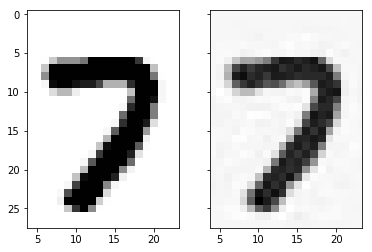

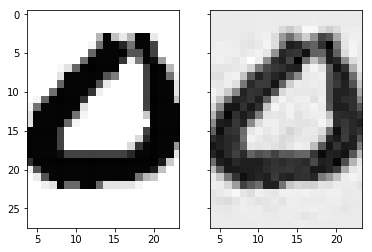

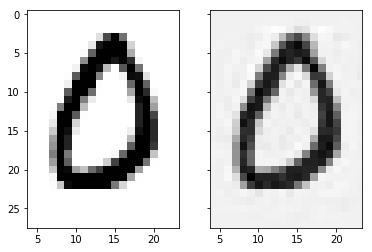

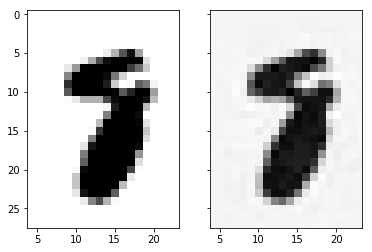

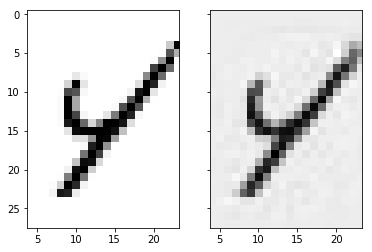

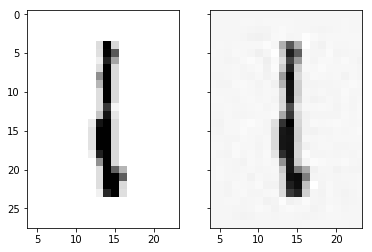

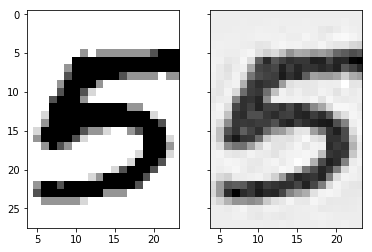

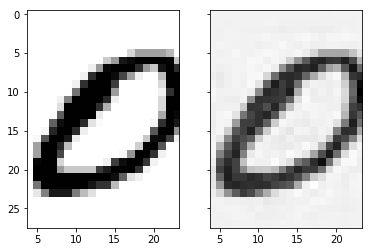

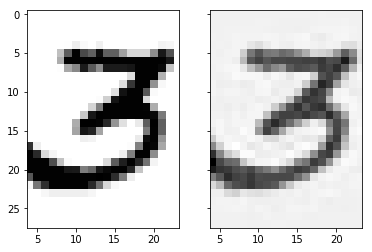

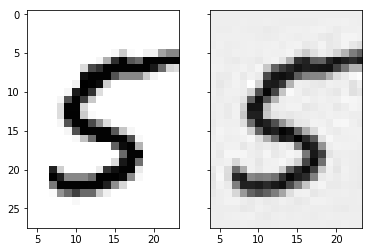

In [32]:
with tf.Session() as sess:
    latest_ckpt = tf.train.latest_checkpoint(save_dir)
    saver.restore(sess, latest_ckpt)
    
    # Randomly test 10 images
    num_imgs = mnist.test.images.shape[0]
    for test in range(10):
        i = np.random.choice(num_imgs)
        img = mnist.test.images[i:i+1]
        
        pred_img = sess.run(X_out, feed_dict={X: img})
        
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        ax1.imshow(img.reshape(28, 28), cmap="Greys")
        ax2.imshow(pred_img.reshape(28, 28), cmap="Greys")

## This worked pretty well!
Let's try one with a smaller representation

In [33]:
tf.reset_default_graph()

# Saving dir
save_dir = "./models/mnist_autoencode2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
checkpt_name = "mnist_autoencode"
full_save_path = os.path.join(save_dir, checkpt_name)

X = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="X")
h1 = tf.layers.dense(X, 300, activation=tf.nn.elu)
h2 = tf.layers.dense(h1, 100, activation=tf.nn.elu)
X_out = tf.layers.dense(h2, mnist.train.images.shape[1], name="X_out")

loss = tf.reduce_mean(tf.square(X-X_out))
optimizer = tf.train.AdamOptimizer(1e-3)
train_op = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=4)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5001):
        X_batch, _ = mnist.train.next_batch(100)
        _, loss_val = sess.run([train_op, loss], feed_dict={X: X_batch})
        
        if i % 50 == 0:
            val_loss = sess.run(loss, feed_dict={X: mnist.validation.images})
            print("Epoch {}: tr loss = {:.2e}; val loss = {:.2e}".format(i, loss_val, val_loss))
            
        if i % 500 == 0:
            saver.save(sess, full_save_path, global_step=i)
            print("Model saved")

Epoch 0: tr loss = 1.49e-01; val loss = 1.26e-01
Model saved
Epoch 50: tr loss = 4.04e-02; val loss = 3.95e-02
Epoch 100: tr loss = 2.74e-02; val loss = 2.62e-02
Epoch 150: tr loss = 1.94e-02; val loss = 1.96e-02
Epoch 200: tr loss = 1.65e-02; val loss = 1.60e-02
Epoch 250: tr loss = 1.46e-02; val loss = 1.37e-02
Epoch 300: tr loss = 1.22e-02; val loss = 1.22e-02
Epoch 350: tr loss = 1.18e-02; val loss = 1.11e-02
Epoch 400: tr loss = 1.04e-02; val loss = 1.03e-02
Epoch 450: tr loss = 1.03e-02; val loss = 9.58e-03
Epoch 500: tr loss = 9.43e-03; val loss = 9.05e-03
Model saved
Epoch 550: tr loss = 9.02e-03; val loss = 8.82e-03
Epoch 600: tr loss = 8.39e-03; val loss = 8.24e-03
Epoch 650: tr loss = 8.32e-03; val loss = 7.96e-03
Epoch 700: tr loss = 7.43e-03; val loss = 7.75e-03
Epoch 750: tr loss = 7.24e-03; val loss = 7.52e-03
Epoch 800: tr loss = 7.47e-03; val loss = 7.37e-03
Epoch 850: tr loss = 7.18e-03; val loss = 7.18e-03
Epoch 900: tr loss = 7.48e-03; val loss = 7.06e-03
Epoch 950:

INFO:tensorflow:Restoring parameters from ./models/mnist_autoencode2/mnist_autoencode-5000


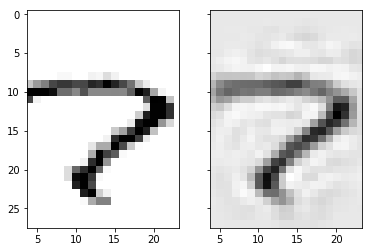

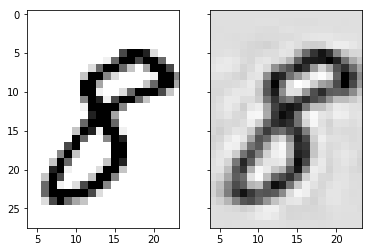

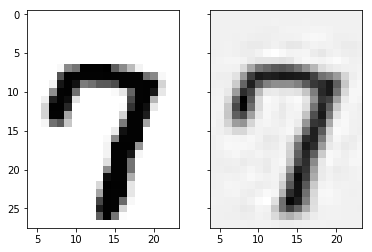

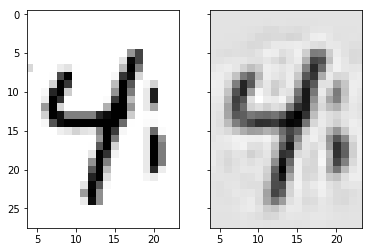

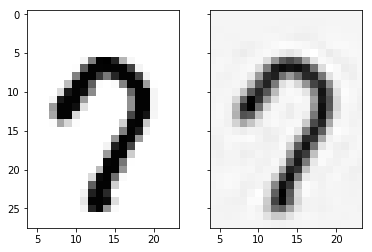

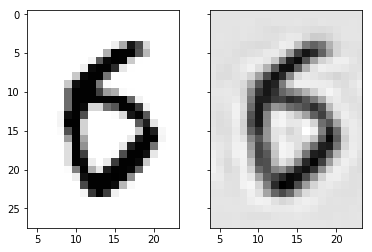

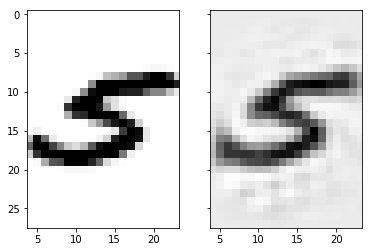

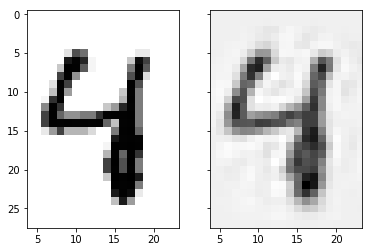

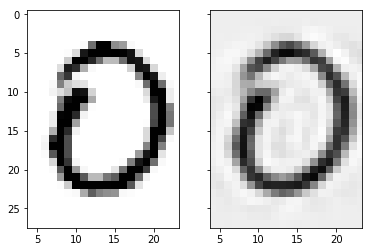

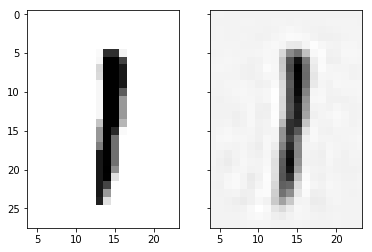

In [34]:
with tf.Session() as sess:
    latest_ckpt = tf.train.latest_checkpoint(save_dir)
    saver.restore(sess, latest_ckpt)
    
    # Randomly test 10 images
    num_imgs = mnist.test.images.shape[0]
    for test in range(10):
        i = np.random.choice(num_imgs)
        img = mnist.test.images[i:i+1]
        
        pred_img = sess.run(X_out, feed_dict={X: img})
        
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        ax1.imshow(img.reshape(28, 28), cmap="Greys")
        ax2.imshow(pred_img.reshape(28, 28), cmap="Greys")

## This is much noisier
Now try adding a better decoder

In [35]:
tf.reset_default_graph()

# Saving dir
save_dir = "./models/mnist_autoencode3"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
checkpt_name = "mnist_autoencode"
full_save_path = os.path.join(save_dir, checkpt_name)

X = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="X")
h1 = tf.layers.dense(X, 300, activation=tf.nn.elu)
h2 = tf.layers.dense(h1, 100, activation=tf.nn.elu)
h3 = tf.layers.dense(h2, 300, activation=tf.nn.elu)
X_out = tf.layers.dense(h3, mnist.train.images.shape[1], name="X_out")

loss = tf.reduce_mean(tf.square(X-X_out))
optimizer = tf.train.AdamOptimizer(1e-3)
train_op = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=4)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5001):
        X_batch, _ = mnist.train.next_batch(100)
        _, loss_val = sess.run([train_op, loss], feed_dict={X: X_batch})
        
        if i % 50 == 0:
            val_loss = sess.run(loss, feed_dict={X: mnist.validation.images})
            print("Epoch {}: tr loss = {:.2e}; val loss = {:.2e}".format(i, loss_val, val_loss))
            
        if i % 500 == 0:
            saver.save(sess, full_save_path, global_step=i)
            print("Model saved")

Epoch 0: tr loss = 1.44e-01; val loss = 1.23e-01
Model saved
Epoch 50: tr loss = 3.15e-02; val loss = 3.12e-02
Epoch 100: tr loss = 2.25e-02; val loss = 1.95e-02
Epoch 150: tr loss = 1.49e-02; val loss = 1.48e-02
Epoch 200: tr loss = 1.26e-02; val loss = 1.23e-02
Epoch 250: tr loss = 1.10e-02; val loss = 1.07e-02
Epoch 300: tr loss = 8.87e-03; val loss = 9.58e-03
Epoch 350: tr loss = 8.95e-03; val loss = 8.75e-03
Epoch 400: tr loss = 8.56e-03; val loss = 8.17e-03
Epoch 450: tr loss = 8.14e-03; val loss = 7.77e-03
Epoch 500: tr loss = 7.46e-03; val loss = 7.47e-03
Model saved
Epoch 550: tr loss = 7.24e-03; val loss = 7.26e-03
Epoch 600: tr loss = 7.34e-03; val loss = 7.10e-03
Epoch 650: tr loss = 6.93e-03; val loss = 6.85e-03
Epoch 700: tr loss = 7.12e-03; val loss = 6.85e-03
Epoch 750: tr loss = 6.50e-03; val loss = 6.68e-03
Epoch 800: tr loss = 6.21e-03; val loss = 6.59e-03
Epoch 850: tr loss = 6.15e-03; val loss = 6.50e-03
Epoch 900: tr loss = 6.65e-03; val loss = 6.46e-03
Epoch 950:

INFO:tensorflow:Restoring parameters from ./models/mnist_autoencode3/mnist_autoencode-5000


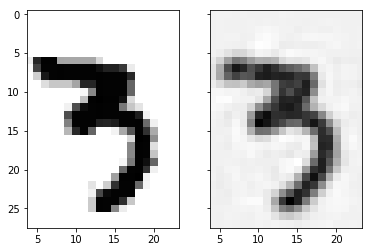

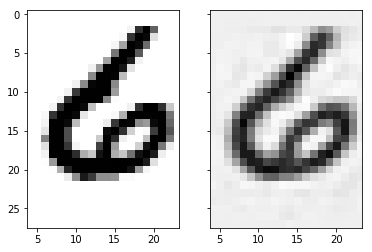

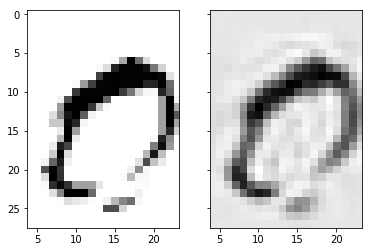

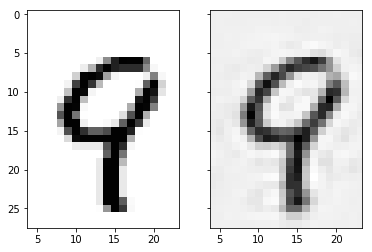

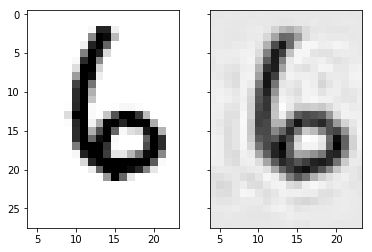

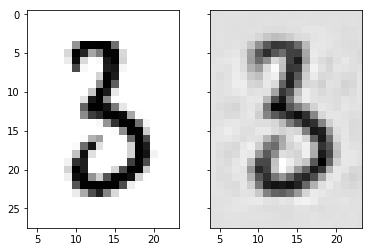

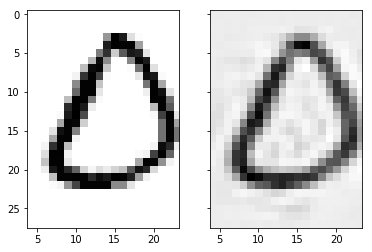

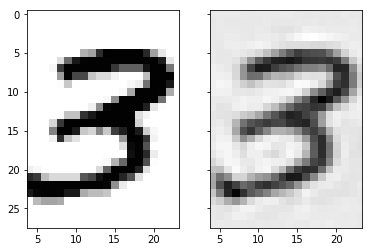

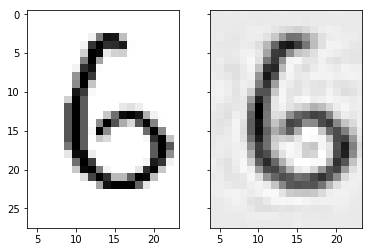

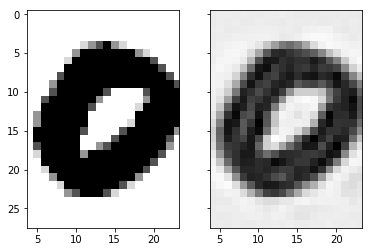

In [36]:
with tf.Session() as sess:
    latest_ckpt = tf.train.latest_checkpoint(save_dir)
    saver.restore(sess, latest_ckpt)
    
    # Randomly test 10 images
    num_imgs = mnist.test.images.shape[0]
    for test in range(10):
        i = np.random.choice(num_imgs)
        img = mnist.test.images[i:i+1]
        
        pred_img = sess.run(X_out, feed_dict={X: img})
        
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        ax1.imshow(img.reshape(28, 28), cmap="Greys")
        ax2.imshow(pred_img.reshape(28, 28), cmap="Greys")

## Try making a variational autoencoder

In [21]:
tf.reset_default_graph()

# Saving dir
save_dir = "./models/mnist_autoencode4_vae"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
checkpt_name = "mnist_autoencode"
full_save_path = os.path.join(save_dir, checkpt_name)

X = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]], name="X")
h1 = tf.layers.dense(X, 500, activation=tf.nn.elu, kernel_initializer=tf.initializers.variance_scaling)
h2 = tf.layers.dense(h1, 500, activation=tf.nn.elu, kernel_initializer=tf.initializers.variance_scaling)

# Variational part
n_enc = 20
enc_mean = tf.layers.dense(h2, n_enc, activation=None, kernel_initializer=tf.initializers.variance_scaling)
enc_gamma = tf.layers.dense(h2, n_enc, activation=None, kernel_initializer=tf.initializers.variance_scaling)
enc_vals = tf.random_normal([n_enc], mean=0.0, stddev=1.0, dtype=tf.float32) \
    * tf.exp(enc_gamma/2.) + enc_mean

h3 = tf.layers.dense(enc_vals, 500, activation=tf.nn.elu, kernel_initializer=tf.initializers.variance_scaling)
h4 = tf.layers.dense(h3, 500, activation=tf.nn.elu, kernel_initializer=tf.initializers.variance_scaling)
X_out = tf.layers.dense(h4, mnist.train.images.shape[1], name="X_out", 
                        activation=None,
                        kernel_initializer=tf.initializers.variance_scaling)

cross_entrop = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=X_out)
# reconst_loss = tf.reduce_sum(cross_entrop)
reconst_loss = tf.reduce_sum(tf.square(X-X_out))
latent_loss = 0.5 * tf.reduce_sum(tf.exp(enc_gamma) + tf.square(enc_mean) - 1 - enc_gamma)
loss = 3 * reconst_loss + latent_loss
optimizer = tf.train.AdamOptimizer(1e-3)
train_op = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=4)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2001):
        X_batch, _ = mnist.train.next_batch(100)
        _, loss_val = sess.run([train_op, loss], feed_dict={X: X_batch})
        
        if i % 200 == 0:
            val_loss = sess.run(loss, feed_dict={X: mnist.validation.images})
            print("Epoch {}: tr loss = {:.2e}; val loss = {:.2e}".format(i, loss_val, val_loss))
            
        if i % 2000 == 0:
            saver.save(sess, full_save_path, global_step=i)
            print("Model saved")

Epoch 0: tr loss = 9.92e+04; val loss = 3.50e+06
Model saved
Epoch 200: tr loss = 1.18e+04; val loss = 5.53e+05
Epoch 400: tr loss = 1.12e+04; val loss = 5.34e+05
Epoch 600: tr loss = 1.06e+04; val loss = 5.71e+05
Epoch 800: tr loss = 1.00e+04; val loss = 4.86e+05
Epoch 1000: tr loss = 9.18e+03; val loss = 4.61e+05
Epoch 1200: tr loss = 9.39e+03; val loss = 4.26e+05
Epoch 1400: tr loss = 9.75e+03; val loss = 4.48e+05
Epoch 1600: tr loss = 8.41e+03; val loss = 4.11e+05
Epoch 1800: tr loss = 8.72e+03; val loss = 4.45e+05
Epoch 2000: tr loss = 8.91e+03; val loss = 4.26e+05
Model saved


INFO:tensorflow:Restoring parameters from ./models/mnist_autoencode4_vae/mnist_autoencode-2000


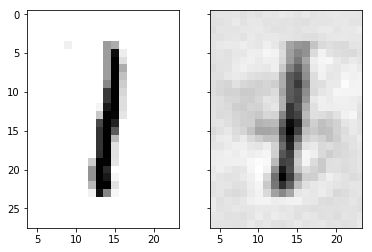

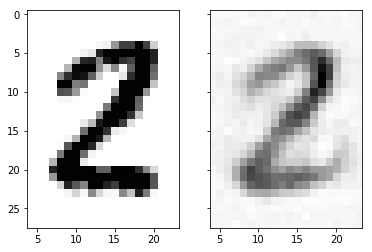

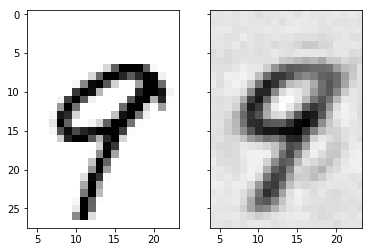

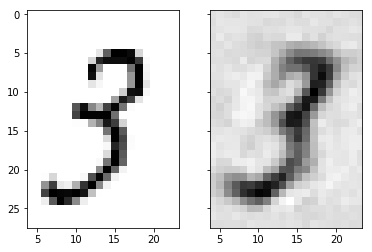

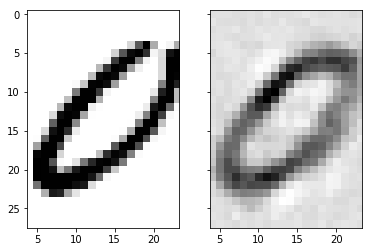

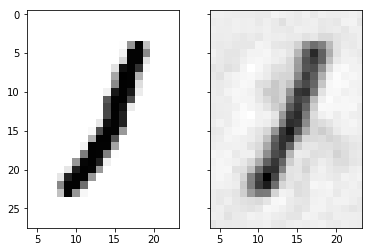

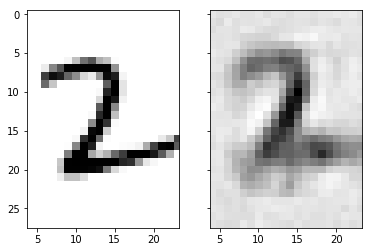

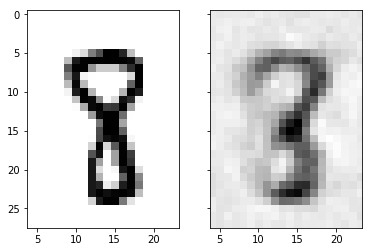

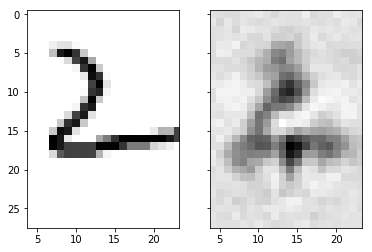

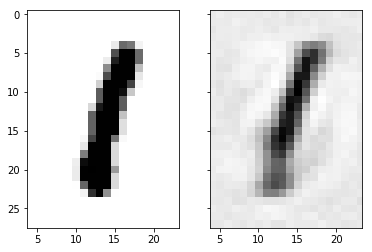

In [22]:
with tf.Session() as sess:
    latest_ckpt = tf.train.latest_checkpoint(save_dir)
    saver.restore(sess, latest_ckpt)
    
    # Randomly test 10 images
    num_imgs = mnist.test.images.shape[0]
    for test in range(10):
        i = np.random.choice(num_imgs)
        img = mnist.test.images[i:i+1]
        
        pred_img = sess.run(X_out, feed_dict={X: img})
        
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        
        ax1.imshow(img.reshape(28, 28), cmap="Greys")
        ax2.imshow(pred_img.reshape(28, 28), cmap="Greys")

INFO:tensorflow:Restoring parameters from ./models/mnist_autoencode4_vae/mnist_autoencode-2000


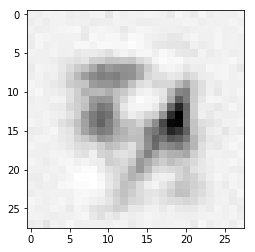

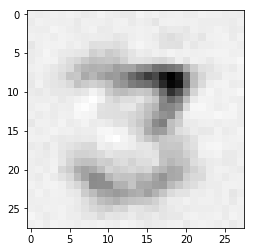

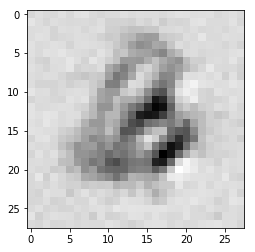

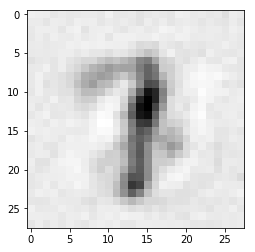

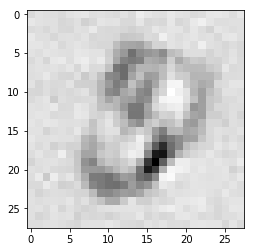

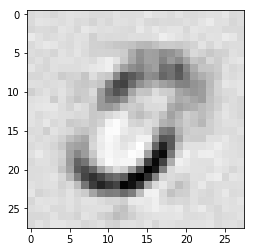

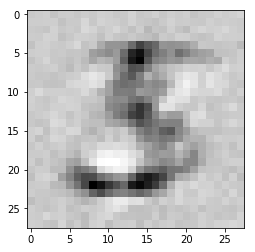

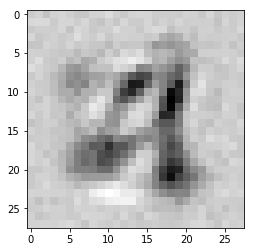

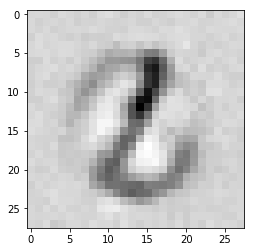

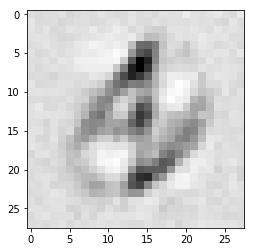

In [23]:
# Generate some random digits
with tf.Session() as sess:
    latest_ckpt = tf.train.latest_checkpoint(save_dir)
    saver.restore(sess, latest_ckpt)
    
    # Randomly test 10 images
    np.random.seed(1775)
    for test in range(10):
        rand_noise = np.random.randn(1,20)
        pred_img = sess.run(X_out, feed_dict={enc_vals: rand_noise})
        
        plt.imshow(pred_img.reshape(28, 28), cmap="Greys")
        plt.show()